In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

In [303]:
pd.plotting.register_matplotlib_converters()
df=pd.read_csv('data.csv')
df['day'] = pd.to_datetime(df['day'],dayfirst=True)
df=df.set_index('day')
df.index = pd.DatetimeIndex(df.index).to_period('D')

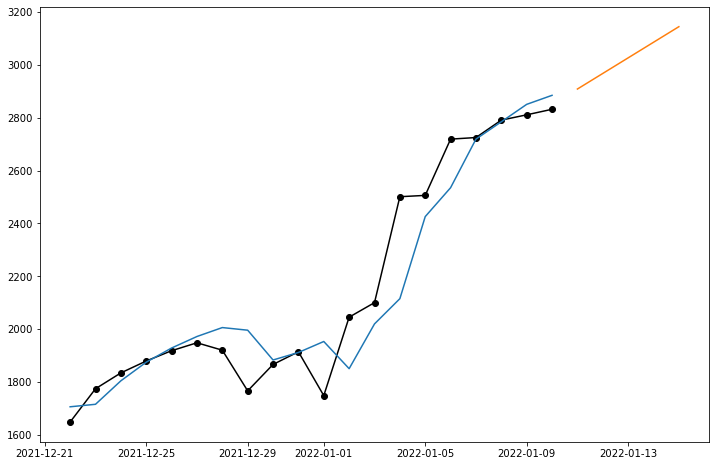

In [304]:
ts=df[df['province']=='01_HN']['cases'].diff()[300:-5]
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black") 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values)
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20))
plt.show()

In [305]:
print("Predict: \nday\n",fcast1,'\n')
print("Realtime: \n",df[df['province']=='01_HN']['cases'].diff().tail(5),'\n')



Predict: 
day
 2022-01-11    2908.635258
2022-01-12    2967.644440
2022-01-13    3026.653623
2022-01-14    3085.662805
2022-01-15    3144.671987
Freq: D, Name: Predict, dtype: float64 

Realtime: 
 day
2022-01-11    2884.0
2022-01-12    2966.0
2022-01-13    2969.0
2022-01-14    3029.0
2022-01-15    2812.0
Freq: D, Name: cases, dtype: float64 



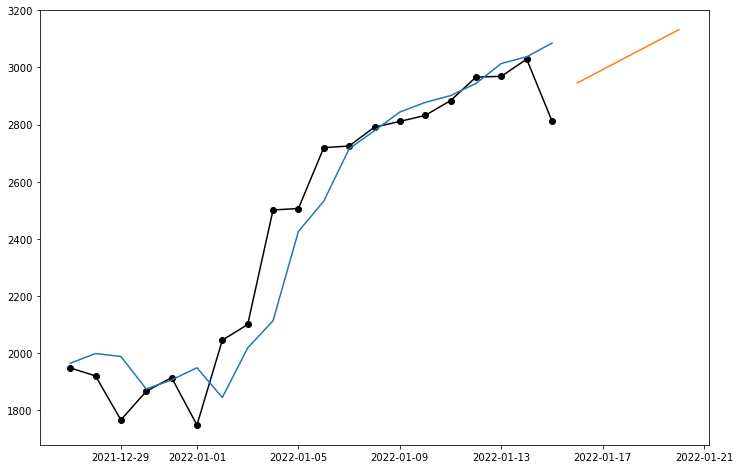

In [306]:
ts=df[df['province']=='01_HN']['cases'].diff()[300:]
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black") 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values)
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20))
plt.show()